In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
# Read data from file
df = pd.read_csv('epa-sea-level.csv')
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


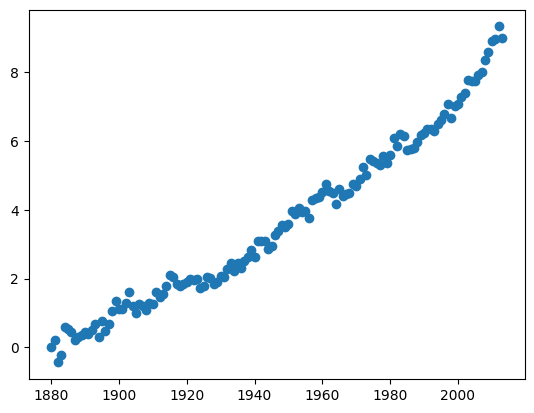

In [3]:
# Create scatter plot
plt.scatter(x=df['Year'], y=df['CSIRO Adjusted Sea Level'])
# Create first line of best fit
# Calculate the line of best fit
slope, intercept, _, _, _ = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])

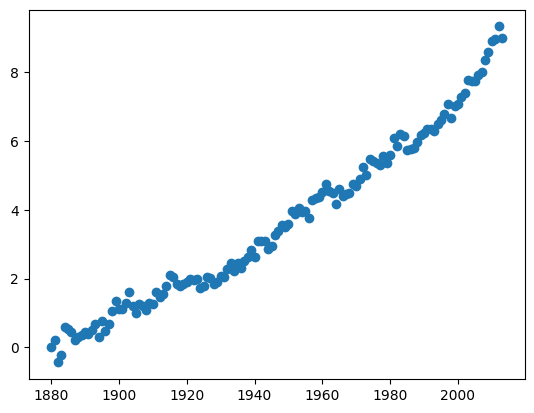

In [4]:
# Extend the line to 'Year' = 2050
target_x = 2050
target_y = slope * target_x + intercept

plot_original = plt.scatter(x=df['Year'], y=df['CSIRO Adjusted Sea Level'])


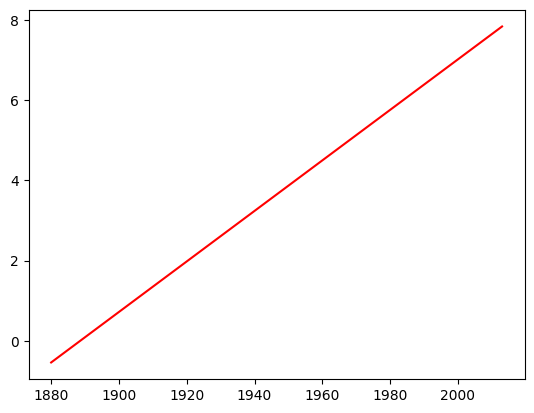

In [5]:
# Plot the line of best fit
plt.plot([min(df['Year']), max(df['Year'])],
            [slope * min(df['Year']) + intercept, slope * max(df['Year']) + intercept], color='red',
            label='Line of Best Fit')

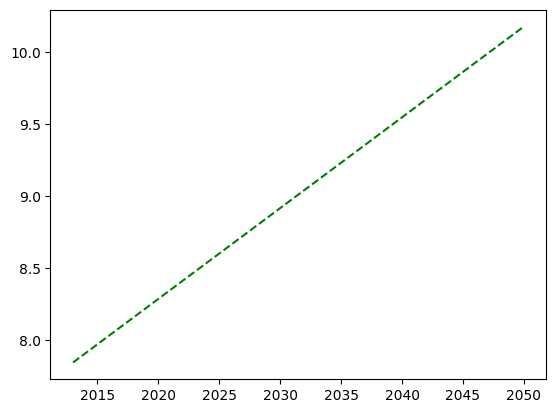

In [7]:
# Plot the extended line
plt.plot([max(df['Year']), target_x], [slope * max(df['Year']) + intercept, target_y], linestyle='--',
             color='green', label='Extended Line')

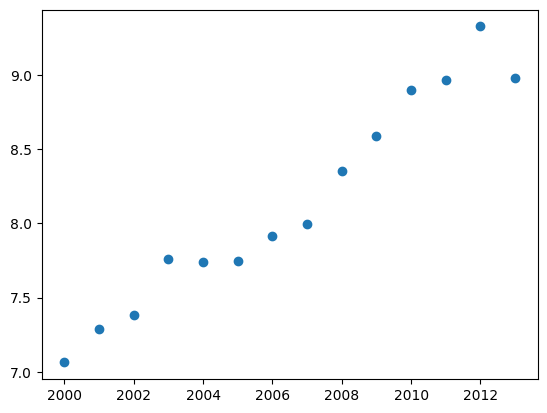

In [8]:
 # Create second line of best fit
new_df = df[df['Year'] >= 2000] # copy of dataframe that fulfills condition

# Calculate the line of best fit
slope, intercept, _, _, _ = linregress(new_df['Year'], new_df['CSIRO Adjusted Sea Level'])

# Extend the line to 'Year' = 2050
target_x = 2050
target_y = slope * target_x + intercept

plt.scatter(x=new_df['Year'], y=new_df['CSIRO Adjusted Sea Level'])

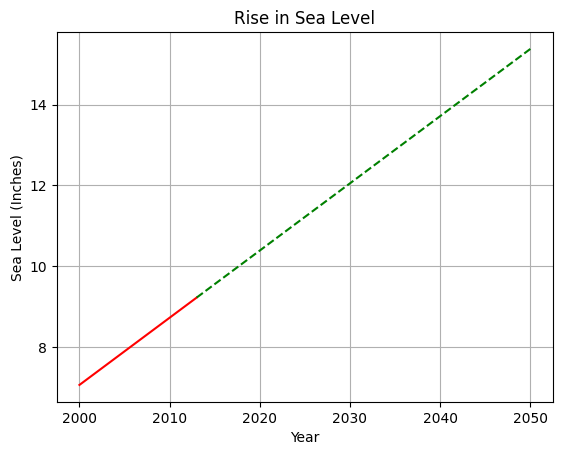

In [12]:
# Plot the line of best fit
plt.plot([min(new_df['Year']), max(new_df['Year'])],
             [slope * min(new_df['Year']) + intercept, slope * max(new_df['Year']) + intercept], color='red',
             label='Line of Best Fit')

# Plot the extended line
plt.plot([max(new_df['Year']), target_x], [slope * max(new_df['Year']) + intercept, target_y], linestyle='--',
             color='green', label='Extended Line')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Sea Level (Inches)')
plt.title('Rise in Sea Level')
plt.grid(True)